In [1]:
import spacy
from collections import Counter
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

# Load the English model
nlp = spacy.load("en_core_web_sm")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#1. Dataset Selection
data = pd.read_csv('/content/drive/MyDrive/AAI520/MODULE1/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#2. Data Exploration
print('The data shape:', data.shape)

#Print out a review for visualization
print('\n A sample review: \n',data.iloc[413][0])

#View sentiment distribution
data['Category'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
print('\n Positive and negative sentiment split: \n', data.Category.value_counts())

#Select 5 reviews that will be used for the text preprocessing
ex1 = data.iloc[413][0]
ex2 = data.iloc[9435][0]
ex3 = data.iloc[1417][0]
ex4 = data.iloc[9744][0]
ex5 = data.iloc[21042][0]

examples = [ex1, ex2, ex3, ex4, ex5]

The data shape: (50000, 2)

 A sample review: 
 A rating of "1" does not begin to express how dull, depressing and relentlessly bad this movie is.

 Positive and negative sentiment split: 
 1    25000
0    25000
Name: Category, dtype: int64


In [5]:
#3. Text Preprocessing
#Tokenization
for i in examples:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  print('Tokens:', tokens)

print('\n')

#Stemming
stemmer = PorterStemmer()
for i in examples:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  words = []
  for j in tokens:
    stems = stemmer.stem(j)
    words.append(stems)
  print('Stems: ', words)

print('\n')

#Lemmatization
for i in examples:
  doc = nlp(i)
  lemmas = [token.lemma_ for token in doc]
  print('Lemmas:', lemmas)

print('\n')

#Stop Words
for i in examples:
  doc = nlp(i)
  sw = [token.text for token in doc if token.is_stop]
  print('Stop Words:', sw)

Tokens: ['A', 'rating', 'of', '"', '1', '"', 'does', 'not', 'begin', 'to', 'express', 'how', 'dull', ',', 'depressing', 'and', 'relentlessly', 'bad', 'this', 'movie', 'is', '.']
Tokens: ['For', 'pure', 'gothic', 'vampire', 'cheese', 'nothing', 'can', 'compare', 'to', 'the', 'Subspecies', 'films', '.', 'I', 'highly', 'recommend', 'each', 'and', 'every', 'one', 'of', 'them', '.']
Tokens: ['Hated', 'it', 'with', 'all', 'my', 'being', '.', 'Worst', 'movie', 'ever', '.', 'Mentally-', 'scarred', '.', 'Help', 'me', '.', 'It', 'was', 'that', 'bad', '.', 'TRUST', 'ME', '!', '!', '!']
Tokens: ['A', 'great', 'film', 'in', 'its', 'genre', ',', 'the', 'direction', ',', 'acting', ',', 'most', 'especially', 'the', 'casting', 'of', 'the', 'film', 'makes', 'it', 'even', 'more', 'powerful', '.', 'A', 'must', 'see', '.']
Tokens: ['Brilliant', '.', 'Ranks', 'along', 'with', 'Citizen', 'Kane', ',', 'The', 'Matrix', 'and', 'Godfathers', '.', 'Must', 'see', ',', 'at', 'least', 'for', 'basset', 'in', 'her', '

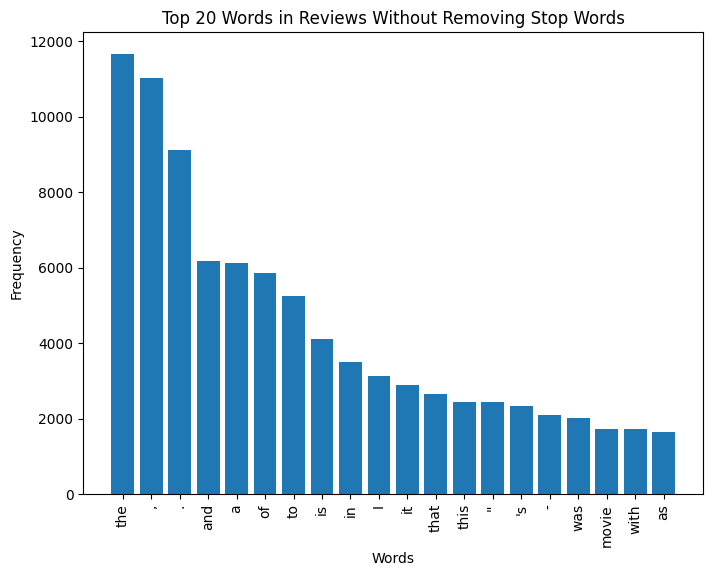

In [6]:
#Visualize the importance of removing stop words for entire dataset
#Make a list of first 1000 reviews in dataset
review = []
for x in range(0,1000):
  review.append(data.iloc[x][0])

#Tokenize the text but do not remove stop words
words = []
for i in review:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  for j in tokens:
    words.append(j)

#Remove breaks in text
non_words = ['/><br','<','br','/>The']
for a in list(words):
    if a in non_words:
        words.remove(a)

#Identify most frequent words
word_freq = Counter(words)
common_words = word_freq.most_common(20)

#Plot results
pairs = pd.DataFrame(common_words, columns=['Word','Frequency'])
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pairs['Word'], pairs['Frequency'])
ax.set_title('Top 20 Words in Reviews Without Removing Stop Words')
ax.set_ylabel('Frequency')
ax.set_xlabel('Words')
plt.xticks(rotation=90)
plt.show()

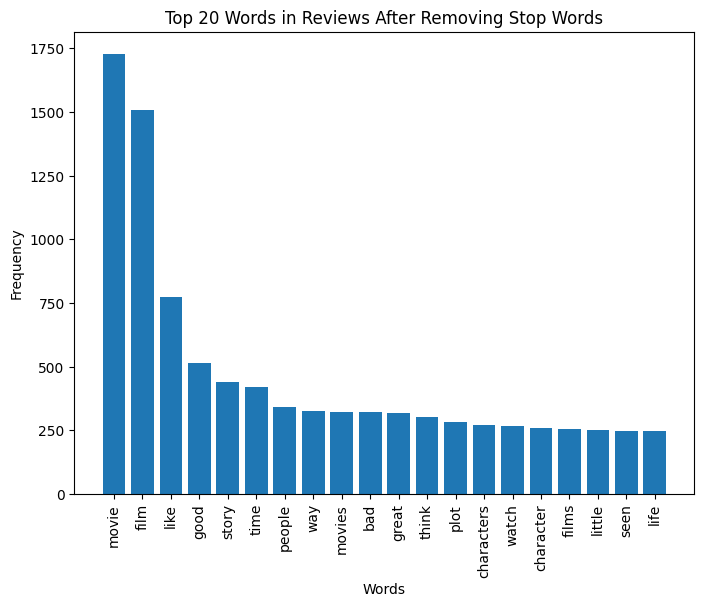

In [7]:
#Visualize the importance of removing stop words for entire dataset
#Tokenize the text and remove stop words and punctuation
words = []
for i in review:
  doc = nlp(i)
  sw = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
  for j in sw:
    words.append(j)

#Remove breaks
non_words = ['/><br','<','br','/>The']
for a in list(words):
    if a in non_words:
        words.remove(a)

#Identify most frequent words
word_freq = Counter(words)
common_words = word_freq.most_common(20)

#Plot results
pairs = pd.DataFrame(common_words, columns=['Word','Frequency'])
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pairs['Word'], pairs['Frequency'])
ax.set_title('Top 20 Words in Reviews After Removing Stop Words')
ax.set_ylabel('Frequency')
ax.set_xlabel('Words')
plt.xticks(rotation=90)
plt.show()